### Projeto de automação do Yahoo Finanças 
 Esse projeto realiza a busca de informações no Yahoo Finanças da ação escolhida para análise, calculando as seguintes informações:
- Cotação máxima
- Cotação mínima
- Valor médio 

Em seguida os dados dessa ação são enviados automaticamente para o o email do gestor. 


### Buscando dados da ação automaticamente 

 - pip install `yfinance`
 - pip install `matplotlib`

Foram as bibliotecas instaladas pelo terminal nessa primeira etapa: coletar as análises do Yahoo Finanças

In [13]:
# Importando a yfinance
import yfinance
print (yfinance.__version__) # Versão 0.2.40

0.2.40


<Axes: xlabel='Date'>

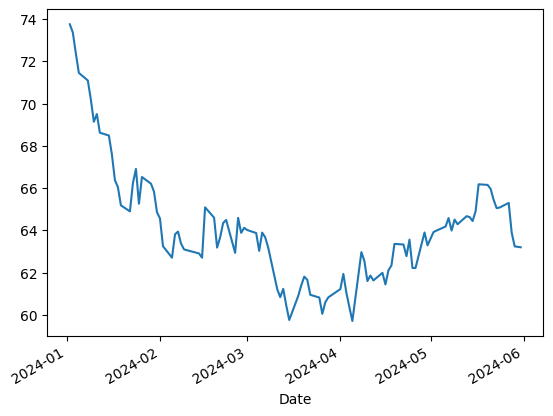

In [18]:
# Recebendo o código da ação que será analisada e guardando na variável 'ticker'
ticker = input("Digite o código da ação que deseja analisar:")

#Filtrando a ação(ticker) recebida e salvando na variável 'dados'
#Filtrando os meses de 2024: 1 de janeiro (início) até 1 de junho (fim). Detalhe: Data formato EUA!
dados = yfinance.Ticker(ticker).history(start="2024-01-01",end="2024-06-01")

# Filtrando apenas a coluna Close para saber apenas como a ação fechou no dia
fechamento = dados.Close

# Gerando gráfico apenas para análise rápida, não será utilizado em seguida
fechamento.plot()

### Criando as análises:
- Cotação máxima
- Cotação mínima 
- Valor médio 


In [19]:
# Cálculo e arredondamento realizado para facilitar a leitura no email para ficar "20.40", por exemplo.
maxima = round(fechamento.max(),2) 
minima = round(fechamento.min(),2)
valor_medio = round(fechamento.mean(),2)

# Saída para análise é opcional manter mas deixo para validar quando trocar de ação, ver se não esqueci de rodar essa parte.
print(maxima)     
print(minima)
print(valor_medio)

73.75
59.71
64.14


#### Enviando o email de forma automática
 A primeira parte de coletar e calcular já foi feita. Em seguida, precisamos realizar o passo a passo:
- abrir o navegador e ir pro gmail
- digitar o email do destinatário e teclar TAB
- digitar o assunto e teclar TAB
- digitar a mensagem 
- clicar no botão enviar 

Bibliotecas utilizadas a partir de agora: `pyautogui`, `pyperclip`, `webbrowser`



In [ ]:
# Lembrando de utilizar a exclamação quando utilizar o pip por aqui
! pip install pyautogui 


In [21]:
# Importando as libs e mostrando sua versão para realizar manutenção no código
# import pyautogui 
# print(pyautogui.__version__) comando utilizado para saber a versão

import pyautogui  # Versão 0.9.54
import pyperclip  # Versão1.8.2
import webbrowser # Lib padrão do Python
import time       # Lib padrão do Python


# Criando as variáveis para salvar as entradas 

# Email que desejo enviar 
destinatario = "suianyjobs@gmail.com" 

# Assunto do email
assunto = "Análises da ação do Yahoo Finanças | Dados coletados do primeiro semestre de 2024 "

# Mensagem que será enviada. O "f" será utilizado para mostrar as variáveis dentro da string.
mensagem = f"""Prezada gestora, bom dia!

Seguem as análises solicitadas sobre a ação {ticker} do último semestre de 2024:

Cotação máxima: R${maxima}
Cotação mínima: R${minima}
Valor médio: R${valor_medio}

Estou disponível se precisar esclarecer alguma dúvida.

Atenciosamente, Suiany.

"""

# Abrindo o navegador e indo para o Gmail
webbrowser.open("www.gmail.com")

#Tempo em segundos para aguardar antes da próxima etapa
time.sleep(4)

#Configurando uma pausa de 4 segundos para cada passo
pyautogui.PAUSE= 4

# Clicando no botão escrever após visualizar as coordenadas
pyautogui.click(x=98, y=292)


# Digitando o email do destinatário e clicando TAB
pyperclip.copy(destinatario)  #copiando o email salvo na variável destinatario
pyautogui.hotkey("ctrl", "v") #usando o atalho para colar 
pyautogui.hotkey("tab")       #usando o atalho TAB


# Digitando o assunto e clicando TAB
pyperclip.copy(assunto)      #copiando o assunto salvo na variável assunto
pyautogui.hotkey("ctrl","v") #usando o atalho para colar
pyautogui.hotkey("tab")      #usando o atalho tab


# Digitando a mensagem do email
pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl","v")


# Clicando para enviar o email 
pyautogui.click(x=1147, y=961)


# Fechando o Gmail
pyautogui.hotkey("ctrl","f4")


# Mensagem de sucesso e finalização da automação.
print(" Tarefa realizada com sucesso!")

0.9.54
 Tarefa realizada com sucesso!


### Para clicar nos botões é necessário utilizar o comando 'position' da lib pyautogui para saber as coordenadas

In [48]:
# Adicionado o tempo de 5s para ir até a página do email e posicionar o cursor do mouse no local do botão

# Descobrindo as coordenadas da tela para utilizar o pyautogui mapeando o botão "escrever" do gmail
time.sleep(5)
pyautogui.position() # Point(x=98, y=292) para o "escrever"

# Em seguida utilizo novamente para saber as coordenadas do botão "enviar" do gmail
time.sleep(5)
pyautogui.position() # Point(x=1147, y=961) para o botão "enviar"



Point(x=1147, y=961)